## Práctica 3 - Fundamentos de Aprendizaje Automático
### Pareja 3 Grupo 1462
- David Teófilo Garitagoitia Romero
- Daniel Cerrato Sánchez

In [10]:
from Plantillas import Datos, EstrategiaParticionado, Roc
from Plantillas.Clasificador import ClasificadorRegresionLogistica, \
                                    ClasificadorRegresionLogistica_SK

from sklearn.linear_model import LogisticRegression

from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataPath = './ConjuntoDatos/'

diabetes = Datos.Datos(dataPath + 'pima-indians-diabetes.csv')
wdbc = Datos.Datos(dataPath + 'wdbc.csv')

estrategiaVS = EstrategiaParticionado.ValidacionSimple(20, 0.3)

n_epochs = [1, 5, 10, 25]
Cs = [1e1, 1e0, 1e-1, 1e-2]
labels = ['diab_norm', 'diab_noNorm', 'wdbc_norm', 'wdbc_noNorm']
line_colors = ['b', 'k', 'y', 'g']

### Regresión Logística Propia

In [3]:
results = []

for C in Cs:
    
    print("Learning Constant Value = %f" % C)
    resultsC =[]
    for n in tqdm(n_epochs):
        
        regLog_norm = ClasificadorRegresionLogistica(n, C, normalize=True)
        regLog_noNorm = ClasificadorRegresionLogistica(n, C, normalize=False)
        
        diab_norm_errorsVS = regLog_norm.validacion(estrategiaVS, diabetes, regLog_norm)
        diab_noNorm_errorVS = regLog_noNorm.validacion(estrategiaVS, diabetes, regLog_noNorm)
        
        wdbc_norm_errorsVS = regLog_norm.validacion(estrategiaVS, wdbc, regLog_norm)
        wdbc_noNorm_errorVS = regLog_noNorm.validacion(estrategiaVS, wdbc, regLog_noNorm)
        
        resultsC.append([
            np.mean(diab_norm_errorsVS), np.mean(diab_noNorm_errorVS),
            np.mean(wdbc_norm_errorsVS), np.mean(wdbc_noNorm_errorVS)
        ])
        
    results.append(resultsC)
    
results = np.array(results)
print("Cálculos finalizados")

Learning Constant Value = 10.000000


100%|██████████| 4/4 [01:32<00:00, 23.11s/it]


Learning Constant Value = 1.000000


100%|██████████| 4/4 [01:30<00:00, 22.54s/it]


Learning Constant Value = 0.100000


100%|██████████| 4/4 [01:30<00:00, 22.66s/it]


Learning Constant Value = 0.010000


100%|██████████| 4/4 [01:30<00:00, 22.51s/it]

Cálculos finalizados


**Análisis del efecto de la normalización**

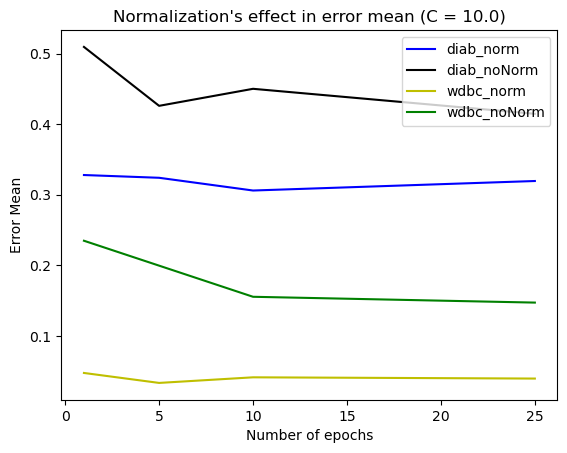

In [4]:
for z in range(4):
    plt.plot(n_epochs, results[0][:, z], line_colors[z], label=labels[z])

plt.legend()
plt.title("Normalization's effect in error mean (C = 10.0)")
plt.xlabel("Number of epochs")
plt.ylabel("Error Mean")

plt.show()

Como ya suponíamos, la normalización de los datos mejora la eficacia del clasificador. Ya ha pasado antes con otros clasificadores con los que hemos practicado, así que este no iba a ser menos.

**Análisis del efecto del número de épocas**

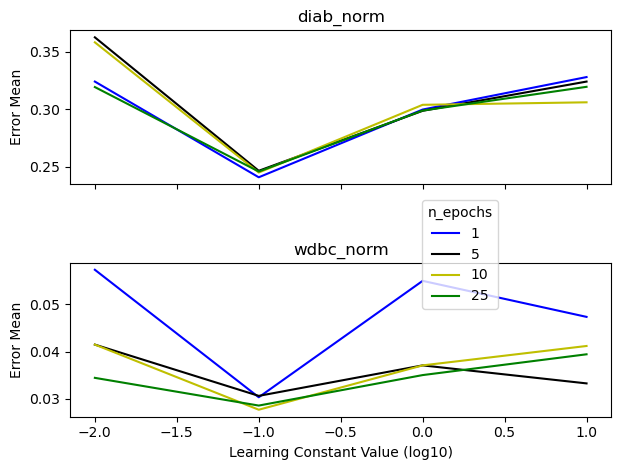

In [5]:
fig, graphs = plt.subplots(2)

i = 0
for z in range(0, 4, 2):  # En cada grafica los datasets distintos y normalizados
    for y in range(4):  # Cada linea es un numero de epoca
        graphs[i].plot(np.log10(Cs), results[:, y, z], line_colors[y], label=n_epochs[y])
    graphs[i].set_title("%s" % labels[z])
    i += 1

for graph in graphs.flat:
    graph.set(xlabel="Learning Constant Value (log10)", ylabel="Error Mean")
    graph.label_outer()

plt.legend(title="n_epochs", loc=(0.65, 0.7))
fig.tight_layout()
plt.show()

Como se puede observar, el mínimo de error se alcanza con 5-10 épocas y una constante de aprendizaje con valor 0'1.

Si nos centramos en examinar el efecto de las épocas en los entrenamientos, podemos ver que varía en gran medida, pero podemos pensar que un número escaso o excesivo de épocas repercute negativamente en la eficacia del clasificador. 

**Análisis del efecto de la constante de aprendizaje**

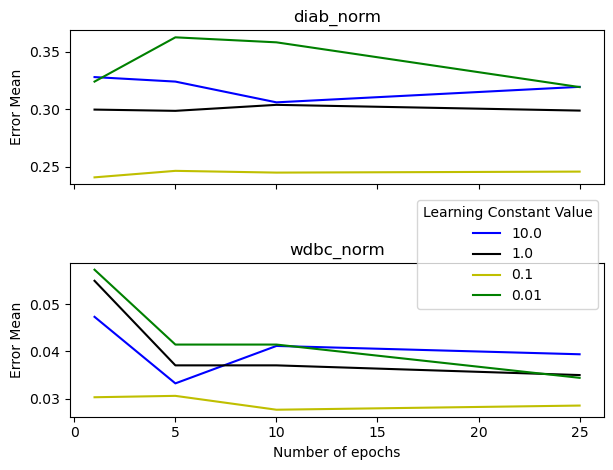

In [6]:
fig, graphs = plt.subplots(2)

i = 0
for z in range(0, 4, 2):
    for x in range(4):
        graphs[i].plot(n_epochs, results[x, :, z], line_colors[x], label=Cs[x])
    graphs[i].set_title("%s" % labels[z])
    i += 1

for graph in graphs.flat:
    graph.set(xlabel="Number of epochs", ylabel="Error Mean")
    graph.label_outer()

plt.legend(title="Learning Constant Value", loc=(0.65, 0.7))
fig.tight_layout()
plt.show()

Como ya habíamos dicho anteriormente, la mejor opción es escoger 5-10 épocas y una constante de aprendizaje con valor 0'1.

En esta comparación, podemos observar que una constante demasiado baja, generalmente da resultados "malos", al igual que si es demasiado alta.

Lo normal suele estar entre 0'1 y 1, pero vemos que para estos dos datasets es mucho mejor el 0'1.

### SKLearn

In [7]:
results_sk = []

for C in Cs:
    
    print("Learning Constant Value = %f" % C)
    resultsC =[]
    for n in tqdm(n_epochs):
        reLogSK = LogisticRegression(solver='liblinear', max_iter=n, C=C)

        regLog_norm = ClasificadorRegresionLogistica_SK(reLogSK, normalize=True)
        regLog_noNorm = ClasificadorRegresionLogistica_SK(reLogSK, normalize=False)
        
        diab_norm_errorsVS = regLog_norm.validacion(estrategiaVS, diabetes, regLog_norm)
        diab_noNorm_errorVS = regLog_noNorm.validacion(estrategiaVS, diabetes, regLog_noNorm)
        
        wdbc_norm_errorsVS = regLog_norm.validacion(estrategiaVS, wdbc, regLog_norm)
        wdbc_noNorm_errorVS = regLog_noNorm.validacion(estrategiaVS, wdbc, regLog_noNorm)
        
        resultsC.append([
            np.mean(diab_norm_errorsVS), np.mean(diab_noNorm_errorVS),
            np.mean(wdbc_norm_errorsVS), np.mean(wdbc_noNorm_errorVS)
        ])
        
    results_sk.append(resultsC)
    
results_sk = np.array(results_sk)
print("Cálculos finalizados")

Learning Constant Value = 10.000000


  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear fai

Learning Constant Value = 1.000000


  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear fai

Learning Constant Value = 0.100000


  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear fai

Learning Constant Value = 0.010000


  0%|          | 0/4 [00:00<?, ?it/s]c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\danic\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear fai

Cálculos finalizados


Para comparar SKLearn con nuestro clasificador, usaremos una constante de aprendizaje de 0'1 y un número de épocas igual a 10

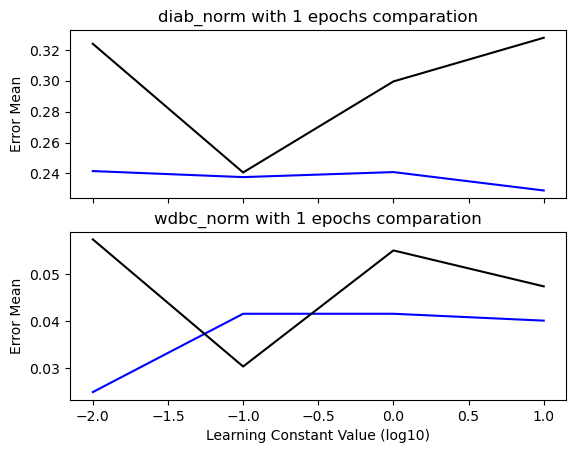

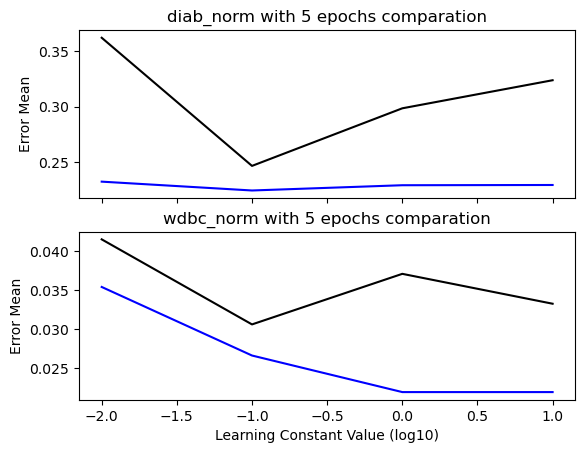

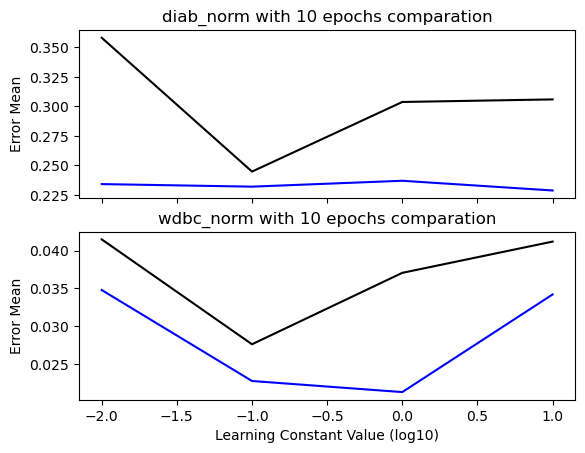

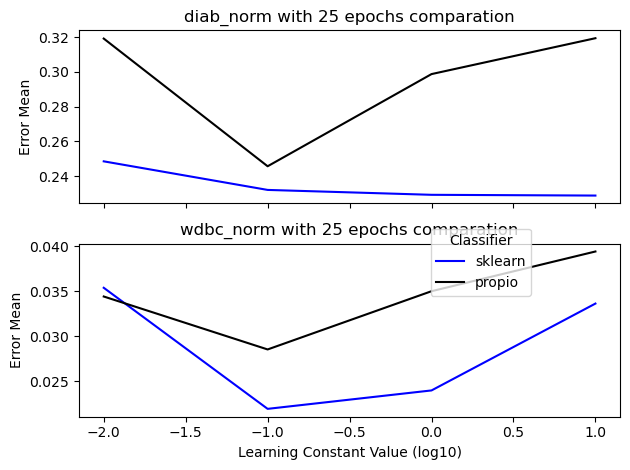

In [8]:
for y in range(4):
    fig, graphs = plt.subplots(2)

    i = 0
    for z in range(0, 4, 2):  # En cada grafica los datasets distintos y normalizados
        graphs[i].plot(np.log10(Cs), results_sk[:, y, z], line_colors[0], label="sklearn")
        graphs[i].plot(np.log10(Cs), results[:, y, z], line_colors[1], label="propio")
        graphs[i].set_title("%s with %d epochs comparation" % (labels[z], n_epochs[y]))
        i += 1

    for graph in graphs.flat:
        graph.set(xlabel="Learning Constant Value (log10)", ylabel="Error Mean")
        graph.label_outer()

plt.legend(title="Classifier", loc=(0.65, 0.7))
fig.tight_layout()
plt.show()

Como se puede ver, el clasificador de SKLearn es bastante mejor que el nuestro, puesto que contiene más hiperparámetros y está mejor implementado.

Diabetes


c:\Users\danic\OneDrive\Escritorio\p3\Plantillas\Roc.py:56: RuntimeWarning: invalid value encountered in longlong_scalars
  fpr=fp/(fp+tn)
c:\Users\danic\OneDrive\Escritorio\p3\Plantillas\Roc.py:57: RuntimeWarning: invalid value encountered in longlong_scalars
  tnr=tn/(fp+tn)


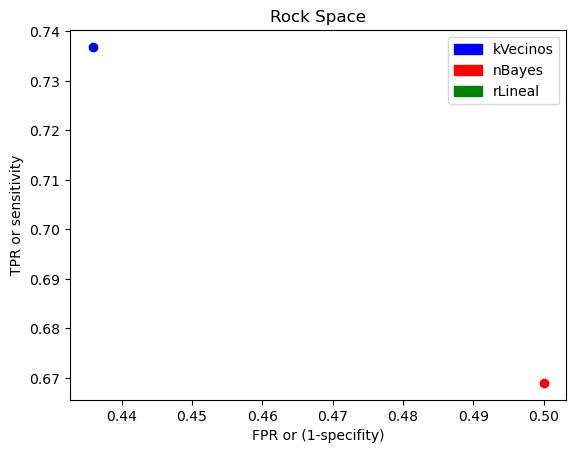

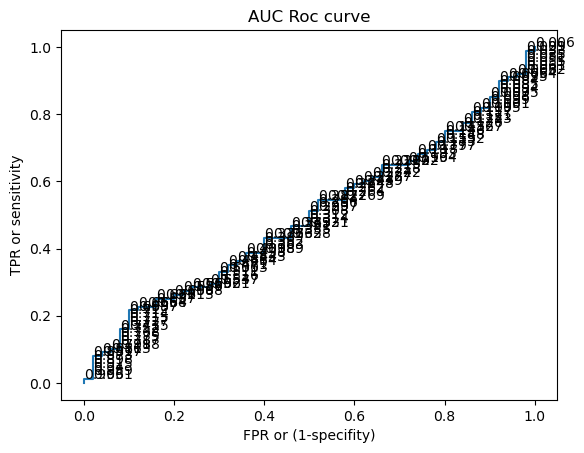

WDBC


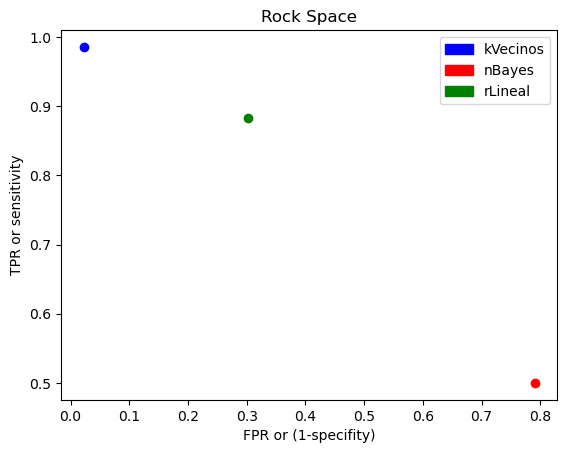

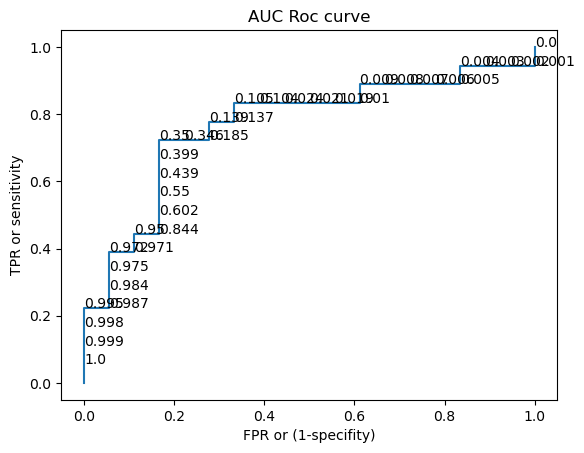

In [12]:
print("Diabetes")
Roc.printRocSpace(diabetes)
Roc.printRocCurve(diabetes)

print("WDBC")
Roc.printRocSpace(wdbc)
Roc.printRocCurve(wdbc)

Resultados:

- Comparando los clasificadores, tanto para el dataset de diabetes como para el de wdbc, el mejor aparenta ser kNN, puesto que es el que más ratio de aciertos tiene frente a falsos positivos. Le sigue regresión logística, que no tiene malos números y el peor sin duda es Naive Bayes.

- La curva ROC de diabetes es bastante 'peor' que la de wdbc, pues el área bajo la curva de diabetes es menor que la de wdbc. La de diabetes es prácticamente recta, mientras que la de wdbc es más amplia, parece tender al 1.